# CRISP-DM Methodology Application on Weather Forecast Data


This notebook applies the CRISP-DM methodology to analyze a weather forecast dataset. We will go through the following steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment
7. Reporting


## 1. Business Understanding

In [2]:

# Kaggle API Download
# First, upload your kaggle.json API token to Colab

from google.colab import files

# Upload kaggle.json
print("Please upload your kaggle.json file:")
files.upload()

# Make directory for Kaggle and move kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset using Kaggle API
!kaggle datasets download -d zeeshier/weather-forecast-dataset -p ./
!unzip ./weather-forecast-dataset.zip -d ./
print("Dataset downloaded and extracted.")


Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset
License(s): CC0-1.0
100% 114k/114k [00:00<00:00, 299kB/s]
100% 114k/114k [00:00<00:00, 298kB/s]
Archive:  ./weather-forecast-dataset.zip
  inflating: ./weather_forecast_data.csv  
Dataset downloaded and extracted.



The objective of this analysis is to understand the factors influencing weather conditions, specifically focusing on whether it will rain based on various meteorological factors. This could be helpful in predicting rain and managing resources for weather-dependent activities.

### Goal
To create a predictive model that can accurately classify whether it will rain based on temperature, humidity, wind speed, cloud cover, and pressure.


## 2. Data Understanding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

# Load dataset
file_path = './weather_forecast_data.csv'
data = pd.read_csv(file_path)
# Initial data exploration
print("=== Dataset Overview ===")
print("\nFirst few rows:")
print(data.head())

print("\nDataset shape:", data.shape)

print("\nData Info:")
print(data.info())

print("\nDescriptive Statistics:")
print(data.describe())

print("\nClass Distribution:")
print(data['Rain'].value_counts(normalize=True))

# Create comprehensive visualizations for data understanding
# Use a Seaborn style with Matplotlib
# Instead of plt.style.use('seaborn-whitegrid'),
# import the Seaborn style to influence Matplotlib plots:
sns.set_style('whitegrid')  # Use Seaborn's 'whitegrid' style
# Now you can create your plots with Matplotlib and they will have the Seaborn style

=== Dataset Overview ===

First few rows:
   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain

Dataset shape: (2500, 6)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usa

Text(0.5, 1.0, 'Pressure Distribution')

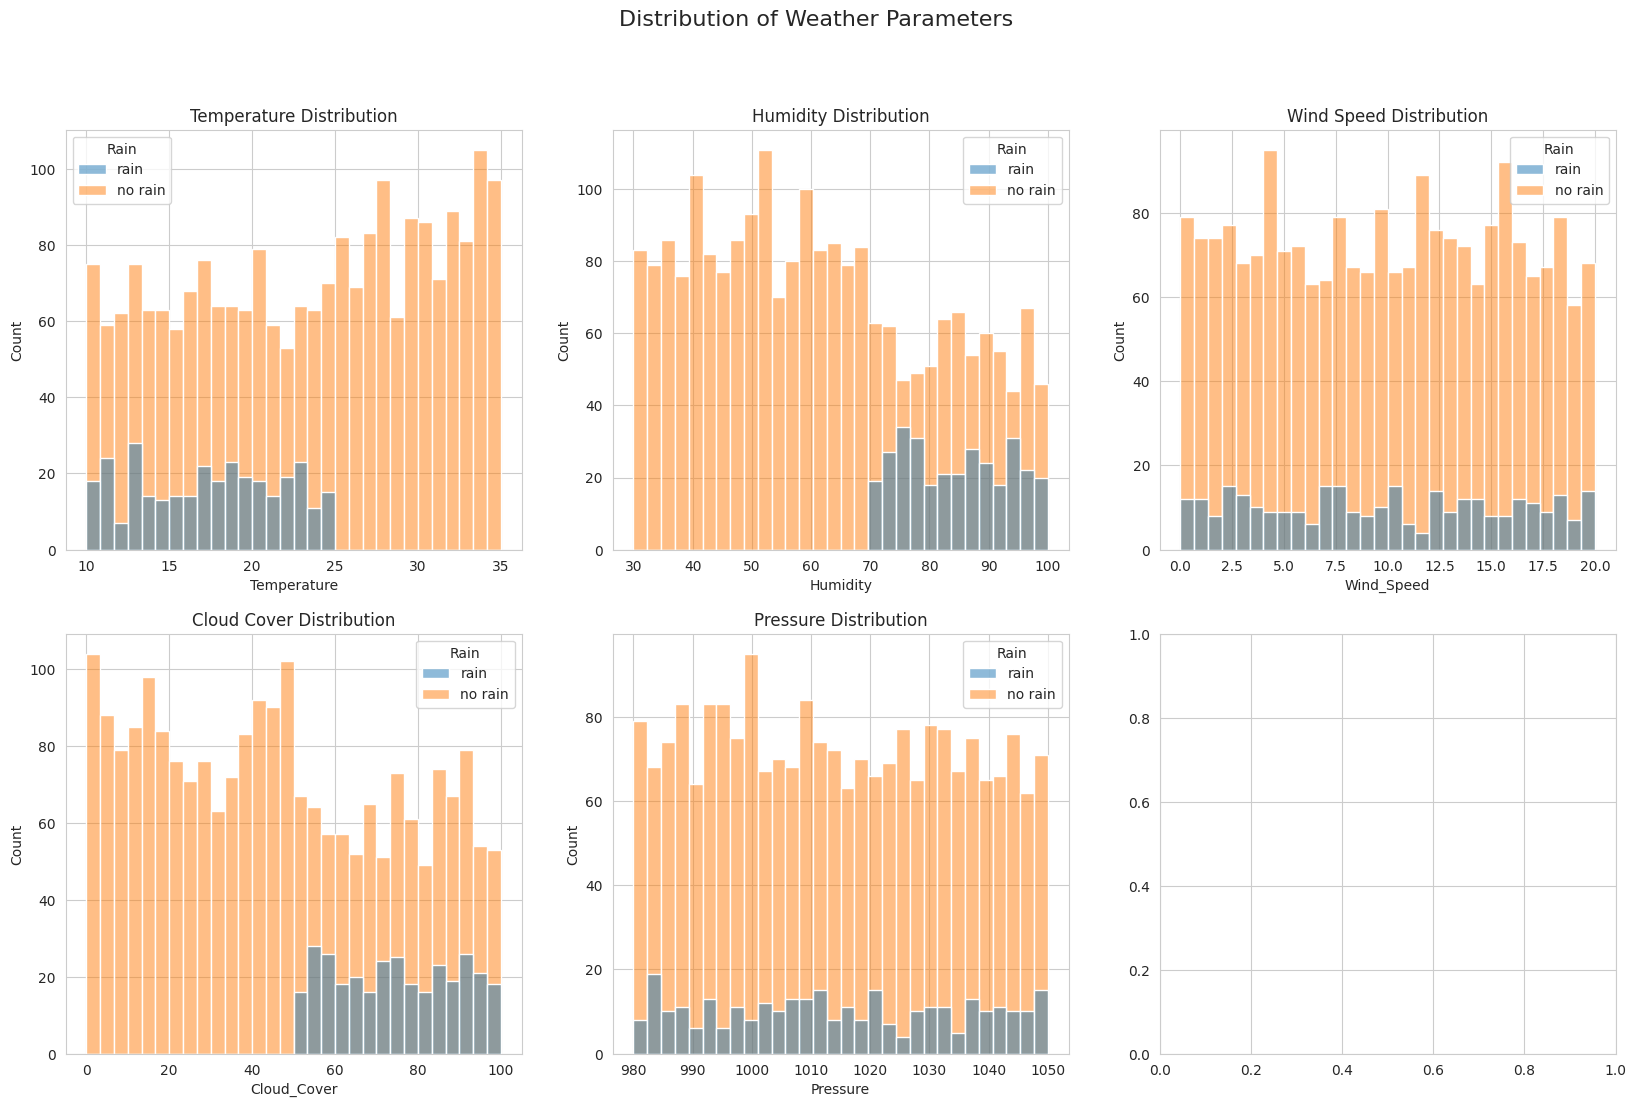

In [4]:

# 1. Distribution of all numerical variables
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Weather Parameters', fontsize=16)

sns.histplot(data=data, x='Temperature', hue='Rain', ax=axes[0,0], bins=30)
axes[0,0].set_title('Temperature Distribution')

sns.histplot(data=data, x='Humidity', hue='Rain', ax=axes[0,1], bins=30)
axes[0,1].set_title('Humidity Distribution')

sns.histplot(data=data, x='Wind_Speed', hue='Rain', ax=axes[0,2], bins=30)
axes[0,2].set_title('Wind Speed Distribution')

sns.histplot(data=data, x='Cloud_Cover', hue='Rain', ax=axes[1,0], bins=30)
axes[1,0].set_title('Cloud Cover Distribution')

sns.histplot(data=data, x='Pressure', hue='Rain', ax=axes[1,1], bins=30)
axes[1,1].set_title('Pressure Distribution')

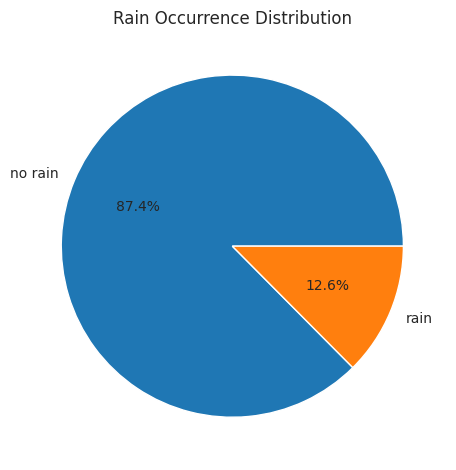

In [5]:
# Create a figure and axes for the pie chart
fig, ax = plt.subplots()  # Create a single subplot

# Add rain occurrence pie chart
sizes = data['Rain'].value_counts()
ax.pie(sizes, labels=sizes.index, autopct='%1.1f%%')  # Plot on the created axes
ax.set_title('Rain Occurrence Distribution')

plt.tight_layout()
plt.show()

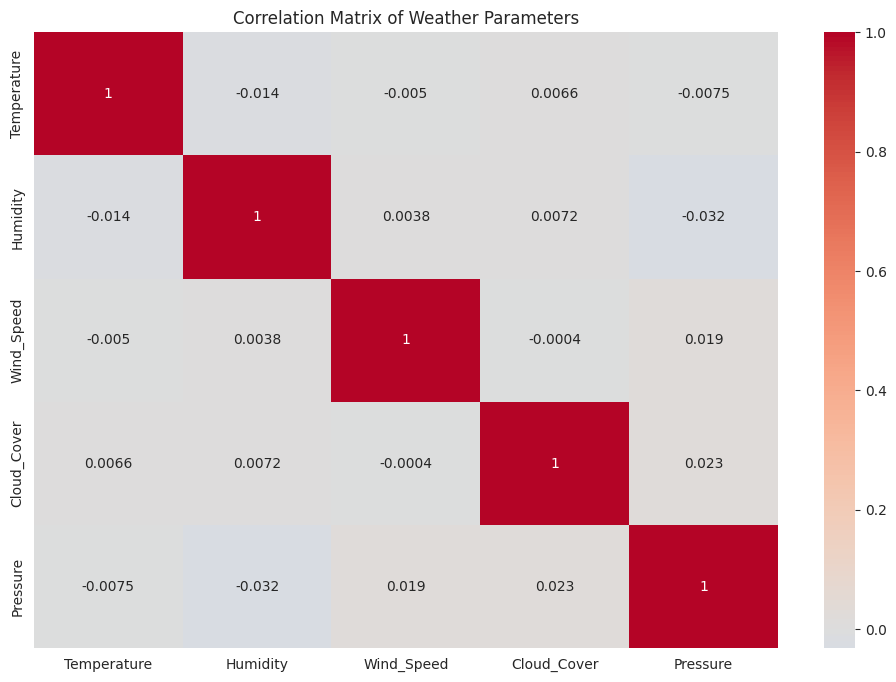

In [6]:
# 2. Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = data.drop('Rain', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Weather Parameters')
plt.show()


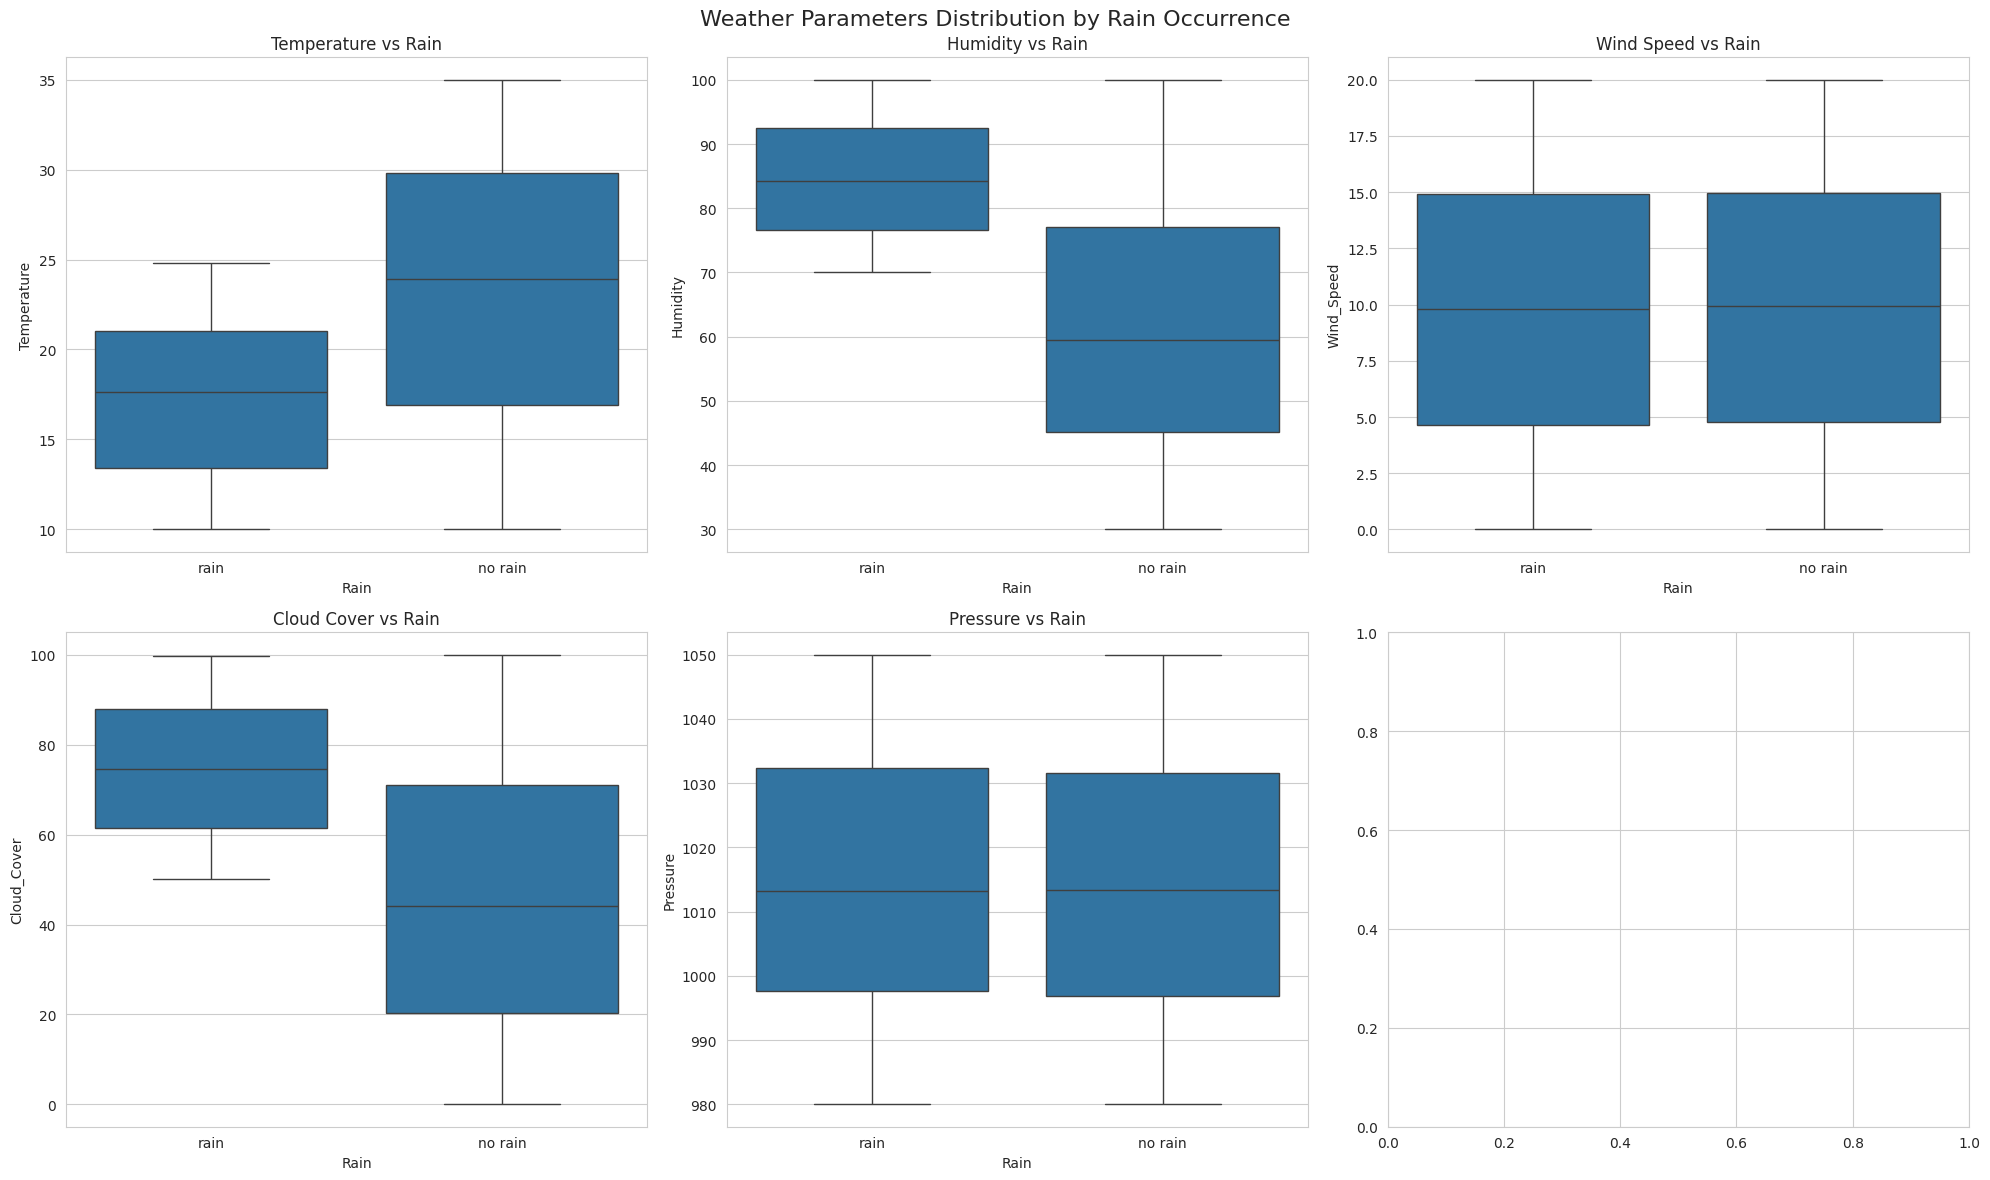

In [7]:
# 3. Box plots for each variable by rain occurrence
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Weather Parameters Distribution by Rain Occurrence', fontsize=16)

sns.boxplot(x='Rain', y='Temperature', data=data, ax=axes[0,0])
axes[0,0].set_title('Temperature vs Rain')

sns.boxplot(x='Rain', y='Humidity', data=data, ax=axes[0,1])
axes[0,1].set_title('Humidity vs Rain')

sns.boxplot(x='Rain', y='Wind_Speed', data=data, ax=axes[0,2])
axes[0,2].set_title('Wind Speed vs Rain')

sns.boxplot(x='Rain', y='Cloud_Cover', data=data, ax=axes[1,0])
axes[1,0].set_title('Cloud Cover vs Rain')

sns.boxplot(x='Rain', y='Pressure', data=data, ax=axes[1,1])
axes[1,1].set_title('Pressure vs Rain')

plt.tight_layout()
plt.show()


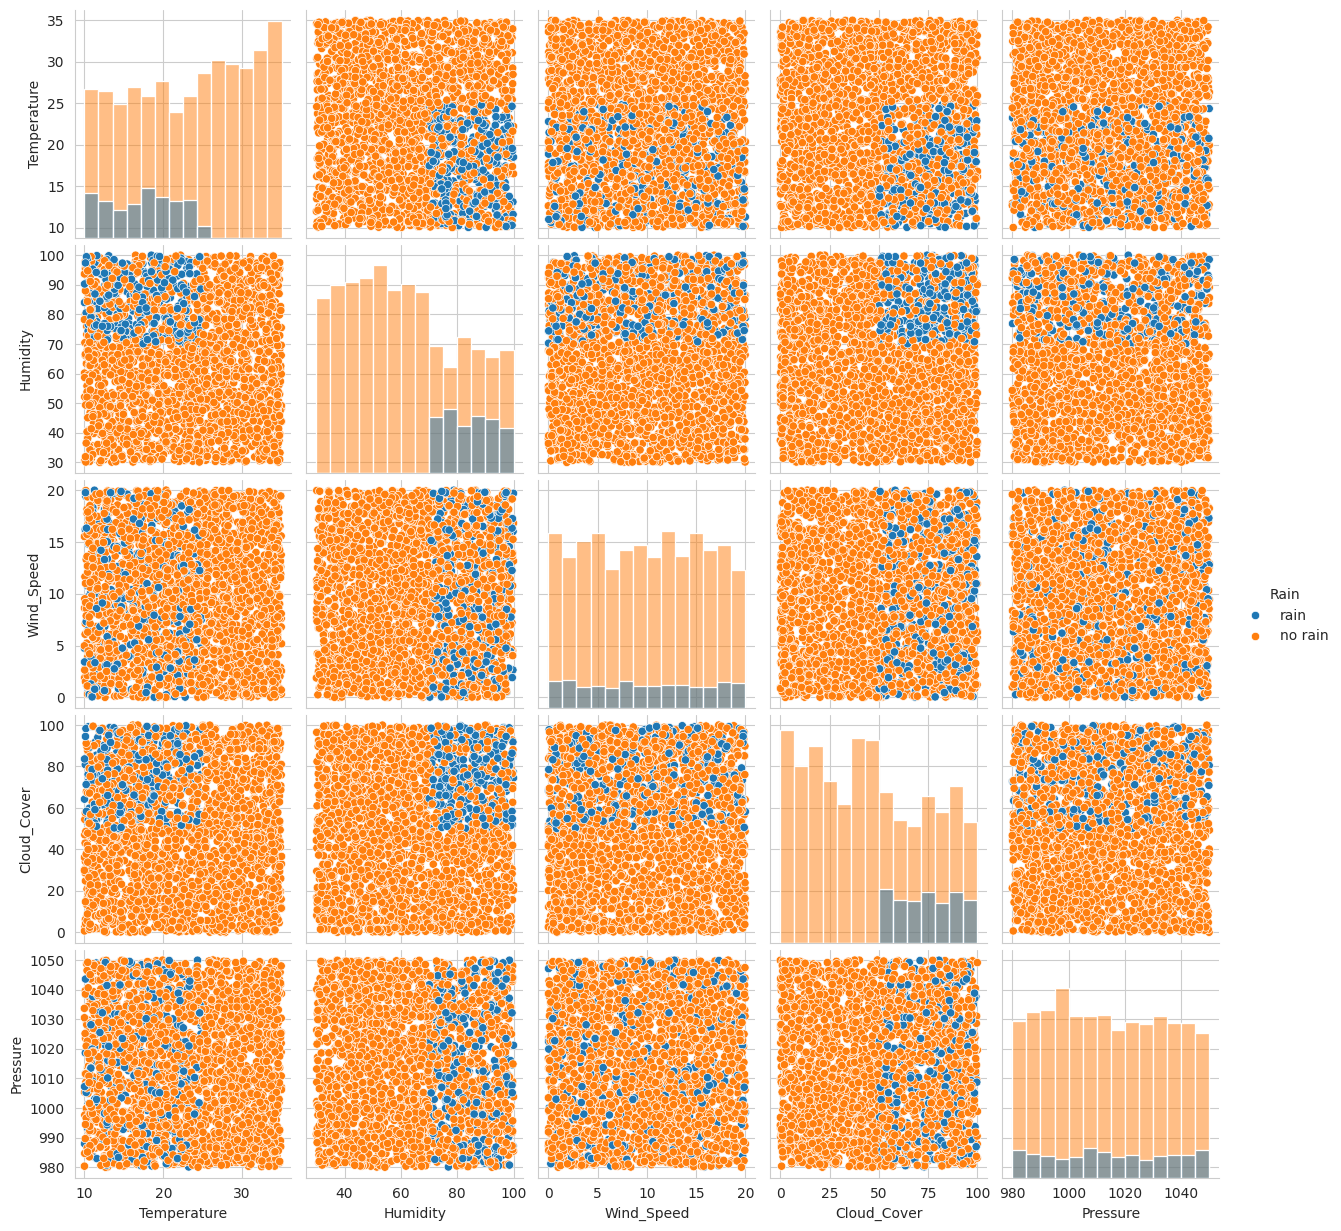


Summary Statistics by Rain Condition:
        Temperature                                                        \
              count       mean       std        min        25%        50%   
Rain                                                                        
no rain      2186.0  23.319913  7.376748  10.001842  16.920559  23.918775   
rain          314.0  17.442619  4.295249  10.016605  13.425949  17.608339   

                              Humidity             ... Cloud_Cover             \
               75%        max    count       mean  ...         75%        max   
Rain                                               ...                          
no rain  29.796251  34.995214   2186.0  61.455151  ...   70.984932  99.997795   
rain     21.046427  24.822007    314.0  84.480176  ...   87.921606  99.672015   

        Pressure                                                               \
           count         mean        std         min         25%          50%   
Rain   

In [8]:
# 4. Scatter plot matrix for key relationships
sns.pairplot(data, hue='Rain', diag_kind='hist')
plt.show()

# Calculate summary statistics for rain vs no rain conditions
print("\nSummary Statistics by Rain Condition:")
print(data.groupby('Rain').describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# 3. DATA PREPARATION

In [9]:
# Create features and target
X = data[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']]
y = (data['Rain'] == 'rain').astype(int)

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4. MODELING

In [12]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

# 5. EVALUATION

In [13]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

In [14]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00        63

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



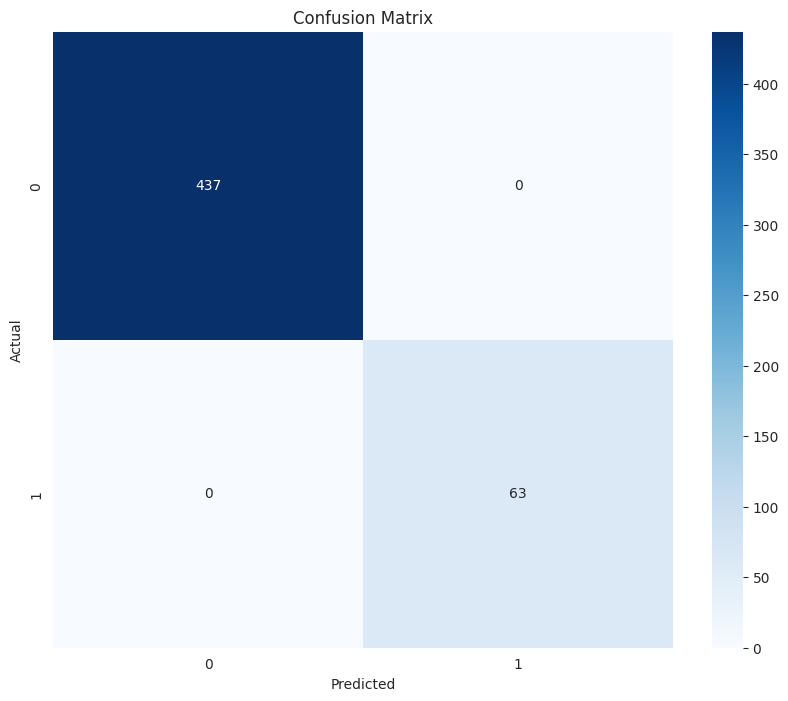

In [15]:
# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

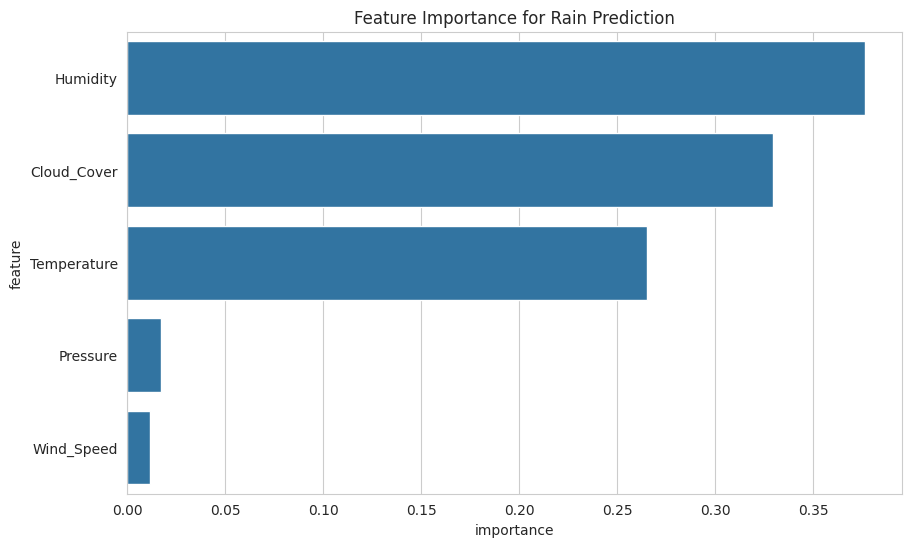

In [16]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Rain Prediction')
plt.show()

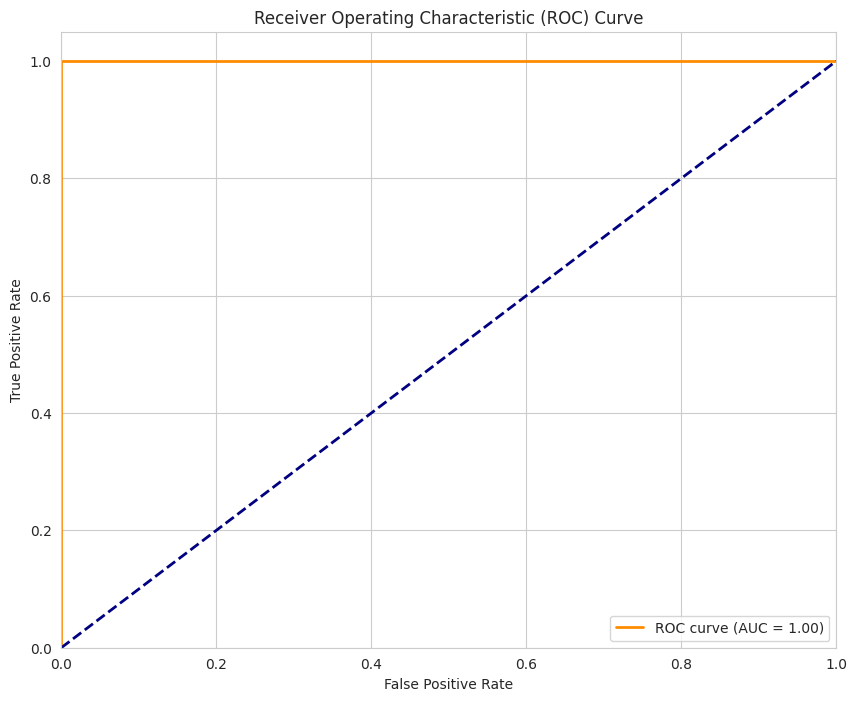

In [17]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 6. DEPLOYMENT

In [18]:
# Create deployment-ready prediction function
def predict_rain_probability(temperature, humidity, wind_speed, cloud_cover, pressure):
    features = np.array([[temperature, humidity, wind_speed, cloud_cover, pressure]])
    features_scaled = scaler.transform(features)
    probability = rf_model.predict_proba(features_scaled)[0][1]
    prediction = "Rain" if probability > 0.5 else "No Rain"
    return prediction, probability


In [21]:
# Save model and scaler for deployment
import joblib
joblib.dump(rf_model, 'rain_prediction_model.joblib')
joblib.dump(scaler, 'feature_scaler.joblib')

['feature_scaler.joblib']